### Analysing my own runs

#### Importing libraries

In [1]:
import pandas as pd
import seaborn as sn



### Reading the data

In [ ]:
data_runs = pd.read_csv("C:\\Users\\JuanCarlosSaraviaDra\\Dropbox\\Activities_garmin_VF.csv", sep=',')

data_runs.head()



In [3]:

data_runs['Avg Pace'] = pd.to_timedelta(data_runs['Avg Pace'])
data_runs['Best Pace'] = pd.to_timedelta(data_runs['Best Pace'])
data_runs['run_time'] = pd.to_timedelta(data_runs['run_time'])
data_runs['Time'] = pd.to_timedelta(data_runs['Time'])

data_runs.head()


,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Total Ascent,...,Best Lap Time,Number of Laps,Moving Time,Elapsed Time,Min Elevation,Max Elevation,run_date,run_time,run_year,Day_time
0,4.15,228,0 days 00:23:28,142,157,168,177,0 days 00:05:39,0 days 00:04:39,6,...,00:35.79,5,00:23:17,00:23:28,90,257,2023-12-11,0 days 07:27:43,2023,Mañana
1,6.04,355,0 days 00:34:06,153,171,174,193,0 days 00:05:39,0 days 00:04:03,40,...,00:10.19,7,00:33:57,00:34:06,189,276,2023-12-09,0 days 06:38:37,2023,Mañana
2,8.09,446,0 days 00:44:02,151,173,176,193,0 days 00:05:27,0 days 00:04:12,11,...,00:21.59,9,00:43:52,00:44:02,179,249,2023-12-08,0 days 06:16:54,2023,Mañana
3,3.13,207,0 days 00:21:24,145,172,168,183,0 days 00:06:51,0 days 00:04:40,2,...,00:34.64,4,00:21:16,00:21:24,162,217,2023-12-07,0 days 16:59:28,2023,Tarde
4,4.02,234,0 days 00:22:53,153,180,170,181,0 days 00:05:42,0 days 00:04:09,2,...,00:04.89,5,00:22:52,00:22:53,84,240,2023-12-06,0 days 06:15:05,2023,Mañana


In [4]:
data_runs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   Distance           356 non-null    float64        
 1   Calories           356 non-null    object         
 2   Time               356 non-null    timedelta64[ns]
 3   Avg HR             356 non-null    int64          
 4   Max HR             356 non-null    int64          
 5   Avg Run Cadence    356 non-null    object         
 6   Max Run Cadence    356 non-null    object         
 7   Avg Pace           356 non-null    timedelta64[ns]
 8   Best Pace          356 non-null    timedelta64[ns]
 9   Total Ascent       356 non-null    object         
 10  Total Descent      356 non-null    object         
 11  Avg Stride Length  356 non-null    float64        
 12  Best Lap Time      356 non-null    object         
 13  Number of Laps     356 non-null    int64          

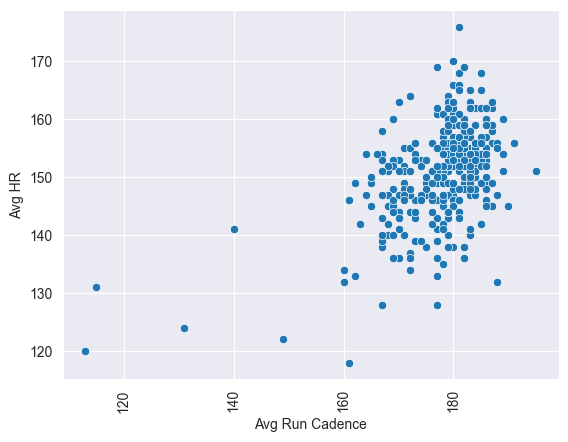

In [11]:
data_runs['Avg Run Cadence'] = pd.to_numeric(data_runs['Avg Run Cadence'])
data_runs = data_runs[data_runs['Avg HR'] > 100] 

ax = sn.scatterplot(x="Avg Run Cadence",
                    y="Avg HR",
                    data=data_runs)
ax.tick_params(axis='x', labelrotation=90)

<Axes: xlabel='Avg Stride Length', ylabel='Avg HR'>

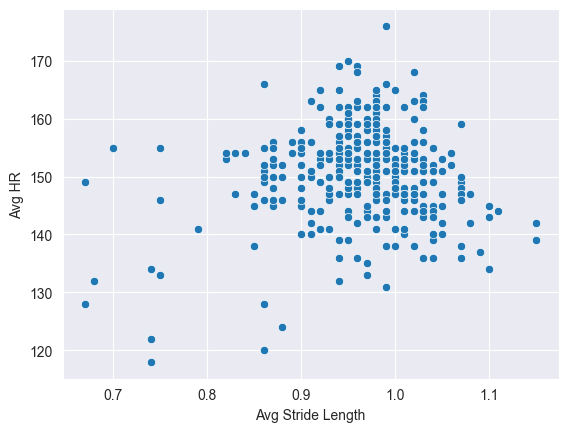

In [9]:
sn.scatterplot(x="Avg Stride Length",
                    y="Avg HR",
                    data=data_runs)